In [17]:
from bs4 import BeautifulSoup
import requests, openpyxl

excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = 'Top Rated IMDB Movies'
data['Year of Release'] = data['Year of Release'].astype(str)
print(excel.sheetnames)
sheet.append(['Movie Rank', 'Movie Name', 'Year of Release', 'IMDB Rating'])

try:
    source = requests.get('https://www.imdb.com/chart/top/')
    source.raise_for_status()

    soup = BeautifulSoup(source.text, 'html.parser')
    
    movies = soup.find('tbody', class_="lister-list").find_all('tr')

    for movie in movies:
        
        name = movie.find('td', class_="titleColumn").a.text

        rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]

        year = movie.find('td', class_="titleColumn").span.text.strip('()')

        rating = movie.find('td', class_="ratingColumn imdbRating").strong.text

        print(rank, name, year, rating)
        sheet.append([rank, name, year, rating])

except Exception as e:
    print(e)

excel.save('Top 250 IMBD Movies.xlsx')

['Top Rated IMDB Movies']
1 The Shawshank Redemption 1994 9.2
2 The Godfather 1972 9.2
3 The Dark Knight 2008 9.0
4 The Godfather Part II 1974 9.0
5 12 Angry Men 1957 9.0
6 Schindler's List 1993 8.9
7 The Lord of the Rings: The Return of the King 2003 8.9
8 Pulp Fiction 1994 8.8
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8
10 Il buono, il brutto, il cattivo 1966 8.8
11 Forrest Gump 1994 8.8
12 Spider-Man: Across the Spider-Verse 2023 8.8
13 Fight Club 1999 8.7
14 The Lord of the Rings: The Two Towers 2002 8.7
15 Inception 2010 8.7
16 Star Wars: Episode V - The Empire Strikes Back 1980 8.7
17 The Matrix 1999 8.7
18 GoodFellas 1990 8.7
19 One Flew Over the Cuckoo's Nest 1975 8.6
20 Se7en 1995 8.6
21 It's a Wonderful Life 1946 8.6
22 Shichinin no samurai 1954 8.6
23 The Silence of the Lambs 1991 8.6
24 Saving Private Ryan 1998 8.6
25 Cidade de Deus 2002 8.6
26 Interstellar 2014 8.6
27 La vita è bella 1997 8.6
28 The Green Mile 1999 8.6
29 Star Wars 1977 8.5
30 Terminator 2

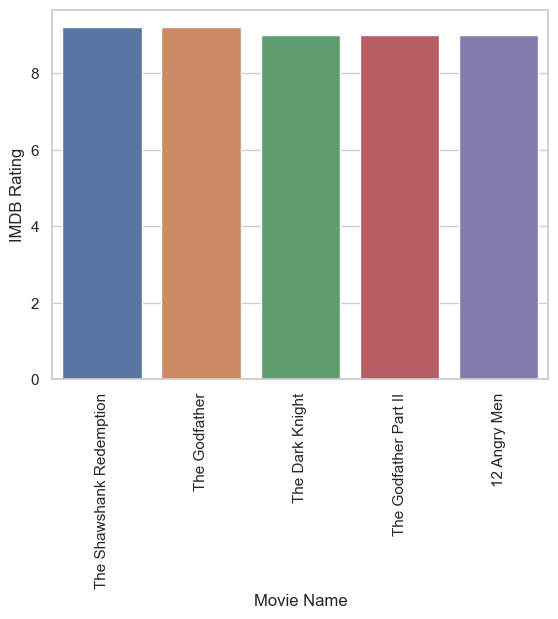

In [7]:
# Bar Plot of IMDB Ratings:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('Top 250 IMBD Movies.xlsx')
data = data.head(5).sort_values(by='IMDB Rating', ascending=False)
sns.set(style="whitegrid")
ax = sns.barplot(x="Movie Name", y="IMDB Rating", data=data)
plt.xticks(rotation=90)
plt.show()

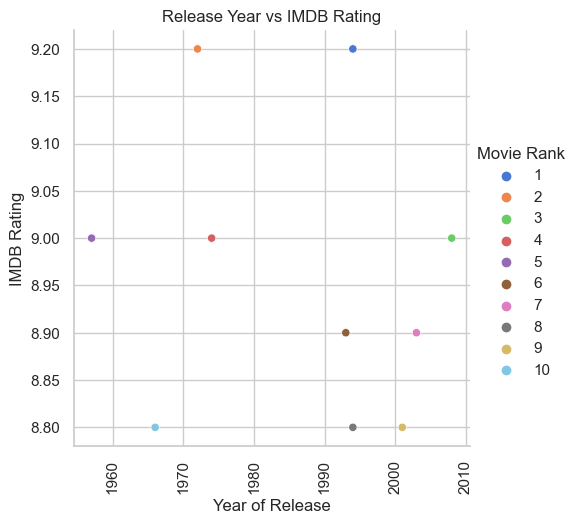

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('Top 250 IMBD Movies.xlsx')
data = data.head(10).sort_values(by='IMDB Rating', ascending=False)
sns.set(style="whitegrid")
ax = sns.relplot(data=data, x="Year of Release", y="IMDB Rating", hue = "Movie Rank", palette = "muted")
plt.title('Release Year vs IMDB Rating')
plt.xticks(rotation=90)
plt.show()